# ETL PROCESS

Provide detailed explanations of ETL Process and make simple ETL in Python that transform these 3 CSV file into single table CSV

ETL, which stands for extract, transform and load, is a data integration process that combines data from multiple data sources into a single, consistent data store that is loaded into a data warehouse or other target system.

ETL provides the foundation for data analytics and machine learning workstreams. Through a series of business rules, ETL cleanses and organizes data in a way which addresses specific business intelligence needs, like monthly reporting, but it can also tackle more advanced analytics, which can improve back-end processes or end user experiences. ETL is often used by an organization to: 

-Extract data from legacy systems

-Cleanse the data to improve data quality and establish consistency

-Load data into a target database

In [1]:
#Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read CSV Using Pandas
final_superstore = pd.read_csv('csv_sample_data/final_superstore.csv')
customer_id_superstore = pd.read_csv('csv_sample_data/Customer_ID_Superstore.csv')
product_id_superstore = pd.read_csv('csv_sample_data/Product_ID_Superstore.csv')

In [3]:
#Print Head
final_superstore.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164


In [4]:
customer_id_superstore.head()

,customer_id,customer_name,segment,city,country,state,region,postal_code
0,CG-12520,Claire Gute,Consumer,Henderson,United States,Kentucky,South,42420
1,DV-13045,Darrin Van Huff,Corporate,Los Angeles,United States,California,West,90036
2,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,United States,Florida,South,33311
3,BH-11710,Brosina Hoffman,Consumer,Los Angeles,United States,California,West,90032
4,AA-10480,Andrew Allen,Consumer,Concord,United States,North Carolina,South,28027


In [5]:
product_id_superstore.head()

,product_id,product_name,sub-category,category
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Bookcases,Furniture
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Chairs,Furniture
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Labels,Office Supplies
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Tables,Furniture
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Storage,Office Supplies


In [6]:
final_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   row_id       9994 non-null   int64  
 1   order_id     9994 non-null   object 
 2   order_date   9994 non-null   object 
 3   ship_date    9994 non-null   object 
 4   ship_mode    9994 non-null   object 
 5   customer_id  9994 non-null   object 
 6   product_id   9994 non-null   object 
 7   sales        9994 non-null   float64
 8   quantity     9994 non-null   int64  
 9   discount     9994 non-null   float64
 10  profit       9994 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.0+ KB


In [7]:
customer_id_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    793 non-null    object
 1   customer_name  793 non-null    object
 2   segment        793 non-null    object
 3   city           793 non-null    object
 4   country        793 non-null    object
 5   state          793 non-null    object
 6   region         793 non-null    object
 7   postal_code    793 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 49.7+ KB


In [8]:
product_id_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1862 non-null   object
 1   product_name  1862 non-null   object
 2   sub-category  1862 non-null   object
 3   category      1862 non-null   object
dtypes: object(4)
memory usage: 58.3+ KB


In [23]:
#Merge Between final_superstore and customer_id_superstore
result = pd.merge(final_superstore, customer_id_superstore, how='left')
result.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,customer_name,segment,city,country,state,region,postal_code
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,41.9136,Claire Gute,Consumer,Henderson,United States,Kentucky,South,42420
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,219.5820,Claire Gute,Consumer,Henderson,United States,Kentucky,South,42420
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,6.8714,Darrin Van Huff,Corporate,Los Angeles,United States,California,West,90036
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Sean O'Donnell,Consumer,Fort Lauderdale,United States,Florida,South,33311
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,2.5164,Sean O'Donnell,Consumer,Fort Lauderdale,United States,Florida,South,33311


In [22]:
#Merge Between result and product_id_superstore
final_result = pd.merge(result, product_id_superstore, how='left')
final_result.head()

# Uncomment for export final_result to csv
# final_result.to_csv('csv_sample_data/final_result.csv')

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,...,customer_name,segment,city,country,state,region,postal_code,product_name,sub-category,category
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,0.00,...,Claire Gute,Consumer,Henderson,United States,Kentucky,South,42420,Bush Somerset Collection Bookcase,Bookcases,Furniture
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,0.00,...,Claire Gute,Consumer,Henderson,United States,Kentucky,South,42420,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Chairs,Furniture
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,0.00,...,Darrin Van Huff,Corporate,Los Angeles,United States,California,West,90036,Self-Adhesive Address Labels for Typewriters b...,Labels,Office Supplies
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,0.45,...,Sean O'Donnell,Consumer,Fort Lauderdale,United States,Florida,South,33311,Bretford CR4500 Series Slim Rectangular Table,Tables,Furniture
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,0.20,...,Sean O'Donnell,Consumer,Fort Lauderdale,United States,Florida,South,33311,Eldon Fold 'N Roll Cart System,Storage,Office Supplies


In [24]:
final_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   product_id     9994 non-null   object 
 7   sales          9994 non-null   float64
 8   quantity       9994 non-null   int64  
 9   discount       9994 non-null   float64
 10  profit         9994 non-null   float64
 11  customer_name  9994 non-null   object 
 12  segment        9994 non-null   object 
 13  city           9994 non-null   object 
 14  country        9994 non-null   object 
 15  state          9994 non-null   object 
 16  region         9994 non-null   object 
 17  postal_code    9994 non-null   int64  
 18  product_

# DATA VISUALIZATION

## Top 5 cities that have the most profit

In [62]:
#Group by city, sum profit
profit_by_city = final_result.groupby('city')['profit'].sum().to_frame().reset_index()

#Sort values descending, get the top 5
top_5_cities = profit_by_city.sort_values(by='profit', ascending=False).head(5)
top_5_cities

,city,profit
161,New York City,41892.8872
217,Seattle,19979.9074
212,San Francisco,17141.7985
95,Houston,13279.5153
183,Philadelphia,12376.6486


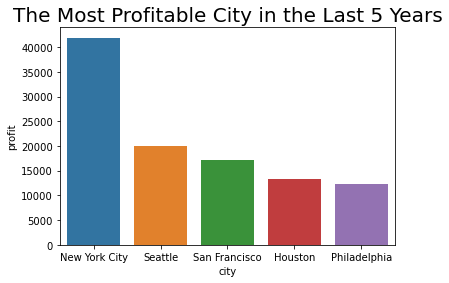

In [177]:
sns.barplot(data=top_5_cities, x='city', y='profit')
plt.title('The Most Profitable City in the Last 5 Years', size=20)
plt.show()

## Sales in each region

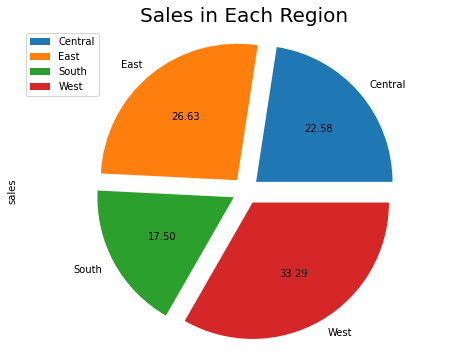

In [178]:
#Group by region, sum sales
pieee = final_result.groupby(['region'])['sales'].sum()
pieee = pieee.reset_index()

pieee.plot.pie(y='sales',figsize=(8,6),labels=pieee['region'],autopct ='%.2f', 
              explode=(0.1,0.1,0.1,0.1))
plt.axis('equal')
plt.title('Sales in Each Region', size=20)
plt.show()

## Highest sales of 5 countries year after year

In [160]:
#Convet object to datetime
final_result['year'] = pd.to_datetime(final_result['order_date']).astype('datetime64[ns]')

#Get the year 
final_result['year'] = pd.DatetimeIndex(final_result['order_date']).year
final_result['year']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: year, Length: 9994, dtype: int64

In [184]:
# Group by year and city
year_city = final_result.groupby(['year','city'])['sales'].sum().reset_index()
year_city.head()

,year,city,sales
0,2014,Akron,1362.346
1,2014,Albuquerque,56.520
2,2014,Amarillo,2003.120
3,2014,Arlington,1850.357
4,2014,Asheville,2723.496


In [125]:
year_city[year_city['year'] == 2014].sort_values(by='sales', ascending = False).head(5)

,year,city,sales
108,2014,Los Angeles,33676.750
138,2014,New York City,31894.020
129,2014,Monroe,24709.390
180,2014,San Francisco,23760.168
80,2014,Houston,21923.401


In [126]:
year_city[year_city['year'] == 2015].sort_values(by='sales', ascending = False).head(5)

,year,city,sales
367,2015,Philadelphia,41369.1812
348,2015,New York City,41143.0266
319,2015,Los Angeles,28270.8246
396,2015,San Francisco,23096.7240
401,2015,Seattle,19071.9670


In [114]:
year_city[year_city['year'] == 2016].sort_values(by='sales', ascending = False).head(5)

,year,city,sales
570,2016,New York City,53094.0530
589,2016,Philadelphia,39895.5208
619,2016,Seattle,33955.4778
542,2016,Los Angeles,33611.0850
615,2016,San Francisco,27990.0305


In [115]:
year_city[year_city['year'] == 2017].sort_values(by='sales', ascending = False).head(5)

,year,city,sales
805,2017,New York City,84795.8925
775,2017,Los Angeles,46212.1510
743,2017,Houston,35002.7730
854,2017,Seattle,33873.4370
824,2017,Philadelphia,32665.9180


In [175]:
top5_sales_by_year = year_city[year_city['city'].isin(['New York City', 'Houston', 'Seattle', 'San Francisco', 'Philadelphia'])]

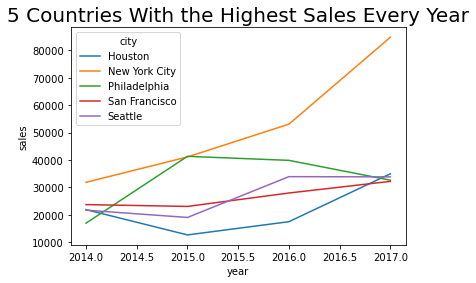

In [192]:
sns.lineplot(data=top5_sales_by_year, x='year', y='sales', hue='city')
plt.title('5 Countries With the Highest Sales Every Year', size=20)
plt.show()

## Which category is ordered the most each year ? 

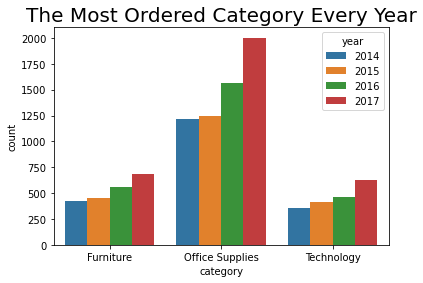

In [195]:
sns.countplot(data=final_result, x='category', hue='year')
plt.title('The Most Ordered Category Every Year', size=20)
plt.show()

# ANSIBLE DEPLOYMENT

## Advantage

### Simple to Learn

The foremost mention among advantages of Ansible refers to its simplicity. The simplicity is not only meant for professionals but also for beginners. It is easy to learn, and so, users could learn to use Ansible quickly along with better productivity.

### Easily Understandable Python Language

Another interesting aspect of Ansible is the facility of Ansible modules that can improve its functionality. The Ansible modules can be written in any language. However, the important concern, in this case, is that the module should return data in JSON format.

### Playbooks are written in YAML

Playbooks are Ansible configuration files, and the language for writing them is YAML. The interesting factor, in this case, is that YAML is a better alternative for configuration management and automation.

## Disadvantage

### Insufficient User Interface

The first entry in the disadvantages of Ansible is the crude user interface. Ansible was initially a command-line only tool. 

### Limited Windows Support

In the case of Windows, Ansible employs a native PowerShell remoting rather than SSH. As a result, a Linux control machine is mandatory for the management of Windows hosts. The limited support for Windows in Ansible presents one of the formidable setbacks with the configuration management and automation tool.

## Ansible Documentation

<img src='ansible_documentation.png' />

Here is a playbook that I made using the ubuntu virtual machine, but I still don't really understand how to use it, especially making localhost. So I don't execute this playbook on the terminal

# SERVER HIGH AVAILABILITY

High availability (HA) is the ability of a system to operate continuously without failing for a designated period of time. HA works to ensure a system meets an agreed-upon operational performance level. In information technology (IT), a widely held but difficult-to-achieve standard of availability is known as five-nines availability, which means the system or product is available 99.999% of the time.

## Five automated strategies to high availability:

### 1. Application-Level Routing

In the event of a transaction failure, cloud-aware applications can be engineered to intelligently route transactions to a secondary service point. A failed transaction query is automatically reprocessed at the secondary working location

<img src='application-level routing.png' />

### 2. Network IP Management

Network IP Management allows a published service IP to move between machines at the time of a failure. This is classified as a self-healing process, where two servers monitor one another. If the first server malfunctions, the second server assumes its roles and processes.

<img src='network ip management.png'/>

### 3. Monitoring

A well-integrated monitoring package not only provides insight into an application and its current function, it monitors error-rates that exceed a predefined threshold. For example, an e-commerce site can set up monitoring on a payment gateway so that if credit card authorization transactions exceed a 20% failure rate, their Network Operations Center (NOC) automatically gets an alert and self-healing tasks on the infrastructure initiate.

Some widely available monitoring packages are Nagios, Cacti, Zabbix, and Icinga

### 4. Stateless Transactions

Engineering an application to perform transactions in a stateless manner significantly improves availability. In a stateless model, any machine only keeps state (data on) transactions that are ‘in fly,’ but after a transaction is completed, any machines that die or degrade have no effect on the state or memory of historic transactions. Clients are therefore not limited to server dependence, and the loss of any pool member in a tier ensures the client session is not interrupted due to a hardware or application fault on a discrete pool member.

### 5. Multi-Site Configurations

In the (unlikely) event of a catastrophic hardware failure, resources can be redeployed to a secondary location in minutes and with little planning. Data replication and resource availability is present in the secondary location, and the just-in-time deployment of entire application infrastructures is measured in minutes, not hours or longer.

When architected and implemented properly, multi-site configurations allow a company to redeploy their entire infrastructure in a new data center.

An organization that cannot tolerate downtime in their application infrastructure will benefit the most from a multi-site configuration. In this situation, the additional site would be a completely independent data center that hosts an independent copy of the primary site infrastructure. Depending on how the site application is configured, the additional site can either be in an active-active configuration that services a portion of the traffic coming into the site, or a primary-failover site that will not serve traffic, but sits idle while continuously replicating data from the primary.